# Df 0 1 0_Trivial Data Source
This tutorial illustrates how use the RDataFrame in combination with a
RDataSource. In this case we use a TTrivialDS, which is nothing more
than a simple generator: it does not interface to any existing dataset.
The TTrivialDS has a single column, col0, which has value n for entry n.




**Author:** Danilo Piparo  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:02 AM.</small></i>

In [1]:
auto nEvents = 128U;
auto d_s = ROOT::RDF::MakeTrivialDataFrame(nEvents);

/ now we have a regular rdataframe: the ingestion of data is delegated to
/ the RDataSource. At this point everything works as before.

In [2]:
auto h_s = d_s.Define("x", "1./(1. + col0)").Histo1D({"h_s", "h_s", 128, 0, .6}, "x");

/ now we redo the same with a rdf from scratch and we draw the two histograms

In [3]:
ROOT::RDataFrame d(nEvents);

/ this lambda redoes what the ttrivialds provides

In [4]:
auto g = []() {
   static ULong64_t i = 0;
   return i++;
};
auto h = d.Define("col0", g).Define("x", "1./(1. + col0)").Histo1D({"h", "h", 128, 0, .6}, "x");

auto c_s = new TCanvas();
c_s->SetLogy();
h_s->DrawClone();

auto c = new TCanvas();
c->SetLogy();
h->DrawClone();

return 0;

Draw all canvases 

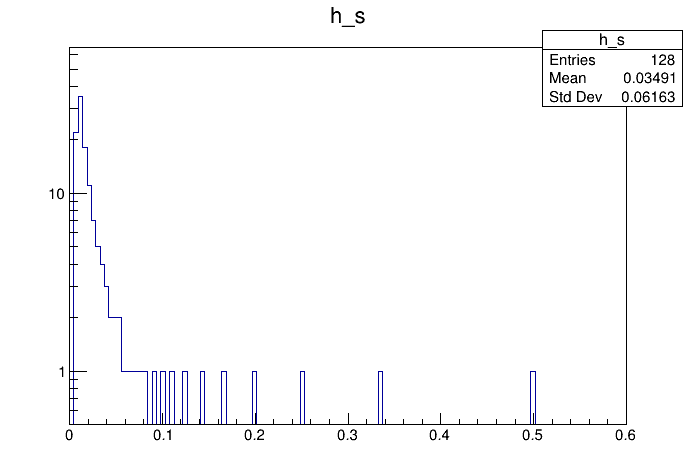

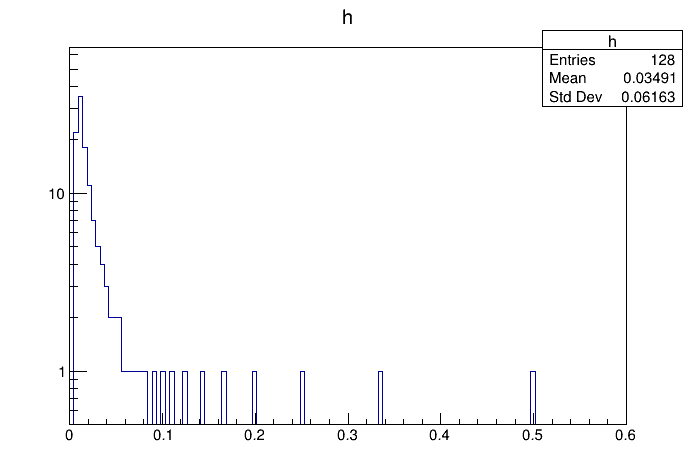

In [5]:
gROOT->GetListOfCanvases()->Draw()